In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 
from math import *
from tqdm import tqdm
from Aero_info import table_atm
from Interpolation import Interp1d, Interp2d

In [3]:
opts = {
    'm_0': 10.6,
    'd': 0.515,
    't_marsh': 12.5,
    'w_marsh': ,
    'P_marsh': 220e3,
    'I': 2700,
    'r_kill': 70,
    'alpha_max': 15,
    'speed_change_alpha': 86,
    'xi': 0.1,
    'V_0': 25,
    'Q_0': 30,
    'am': 10,
    'dny': 1
}

In [3]:
class Missile(object):
    
    def __init__(self, **kwargs):
        """
        Конструктор класса Missile:
         dny        -- запас по перегрузке
         am         -- коэф-т, характеризующий быстроту реакции ракеты на манёвр цели
         m_itr      -- масса [кг] ракеты от времени [с]
         P_itr      -- тяга [Н] ракеты от времени [с]
         S_m        -- площадь миделя [м^2] (к которой относятся АД коэффициенты)
         alpha_max  -- максимальный угол атаки [градусы]
         speed_change_alpha -- скорость изменения угола атаки [градусы / с]
         xi         -- коэффициент, характеризующий структуру подъёмной силы аэродинамической схемы ракеты
         Cx_itr     -- интерполятор определения коэффициента лобового сопротивления ракеты
                       от угла атаки [градусы] и от числа маха 
         atm_itr    -- интерполятор параметров атмосферы
        """
        self.dt   = kwargs['dt']
        self.g    = kwargs['g']
        self.V_0  = kwargs['V_0']
        self.x_0  = kwargs['x_0']
        self.y_0  = kwargs['y_0']
        self.Q_0  = kwargs['Q_0']
        self.t_0  = kwargs['t_0']
        self.am   = kwargs['am']
        self.dny  = kwargs['dny']
        self.S_m  = kwargs['S_m']
        self.xi   = kwargs['xi']
        self.P_itr   = kwargs['P_itr']
        self.m_itr   = kwargs['m_itr']
        self.Cx_itr  = kwargs['Cx_itr']
        self.atm_itr = kwargs['atm_itr']
        self.Cya_itr = kwargs['Cya_itr']
        self.r_kill  = kwargs['r_kill']
        self.alpha_0 = kwargs['alpha_0']
        self.alpha_max          = kwargs['alpha_max']
        self.speed_change_alpha = kwargs['speed_change_alpha']
        self.alpha_targeting    = 0        

    @classmethod
    def get_missile(cls, dict_opts):
        """
        Классовый метод создания стандартной ракеты со всеми необходимыми аэродинамическими, массо-
        и тяговременными характеристиками
        arguments: dict_opts {dict} -- словарь с параметрами проектируемой ракеты
        returns:   экземпляр класса Missile {cls}
        """
        
        @np.vectorize
        def get_m(t):
            if t < t_marsh:
                return m_0 - G_marsh * t
            else:
                return m_0 - w_marsh
            
        @np.vectorize
        def get_P(t):
            if t < t_marsh:
                return P_marsh
            else:
                return 0
        
        dt      = dict_opts.get('dt', 0.001)
        g       = dict_opts.get('g', 9.80665)
        V_0     = dict_opts.get('V_0', 0)
        x_0     = dict_opts.get('x_0', 0)
        y_0     = dict_opts.get('y_0', 0)
        Q_0     = dict_opts.get('Q_0', 0)
        alpha_0 = dict_opts.get('alpha_0', 0)
        t_0     = dict_opts.get('t_0', 0)
        am      = dict_opts.get('am')
        dny     = dict_opts.get('dny', 1)
        d       = dict_opts.get('d')
        m_0     = dict_opts.get('m_0')
        t_marsh = dict_opts.get('t_marsh')
        w_marsh = dict_opts.get('w_marsh')
        P_marsh = dict_opts.get('P_marsh')
        I       = dict_opts.get('I')
        r_kill  = dict_opts.get('r_kill')
        xi      = dict_opts.get('xi')
        S_m     = dict_opts.get('S_m')
        alpha_max = dict_opts.get('alpha_max')
        speed_change_alpha = dict_opts.get('speed_change_alpha')
        
        S_mid   = np.pi * d ** 2 / 4
        G_marsh = w_marsh / t_marsh
          
        ts    = np.linspace(0, t_marsh, 100)
        m_itr = Interp1d(ts, get_m(ts))
        P_itr = Interp1d(ts, get_P(ts))
        
        
        Cx_itr  = # Interp2d(alpha_from_csv, M_from_csv, Cx_from_csv)
        Cya_itr = # Interp1d(M_for_Cya, Cya_from_mathcad) M_for_Cya = np.array([0.6,0.9,1.1,1.5,2.0]) Cya_from_mathcad = np.array([0.306,0.341,0.246,0.246,0.218])
        
#         wd = os.path.abspath(__file__)
#         wd = os.path.dirname(wd)
#         fp = os.path.join(wd, 'aerodynamic.csv')
#         df = pd.read_csv(fp)
#         df = df[df['D'] == 0]
# #--------------------------------------------------------------
#         alpha_from_csv = np.unique(df['A'].to_numpy())
#         M_from_csv = np.array(np.unique(df['M'].to_numpy()))
#         Cx_from_csv = np.array(np.split(df['Cx'].to_numpy(), M_from_csv.size)).T
#         Cya_from_csv = np.array(np.split(df['Cya'].to_numpy(), M_from_csv.size)).T
#         M_for_Cya = np.array([0.6,0.9,1.1,1.5,2.0])
#         Cya_from_mathcad = np.array([0.306,0.341,0.246,0.246,0.218])
#         Cya_itr = Interp1d(M_for_Cya, Cya_from_mathcad)
# #--------------------------------------------------------------     
        
#         M_for_Cya = np.array([0.6,0.9,1.1,1.5,2.0]) # what is it?
#         Cya_from_mathcad = np.array([0.306,0.341,0.246,0.246,0.218]) # what is it?
#         Cya_itr = Interp1d(M_for_Cya, Cya_from_mathcad)
        
        missile = cls(
            dt       = dt,
            g        = g,
            V_0      = V_0,
            x_0      = x_0,
            y_0      = y_0,
            Q_0      = Q_0,
            t_0      = t_0,
            am       = am,
            dny      = dny,
            S_m      = S_m,
            alpha_0  = alpha_0,
            m_itr    = m_itr,
            P_itr    = P_itr,
            alpha_max = alpha_max,
            speed_change_alpha = speed_change_alpha,
            xi       = xi,  
            Cx_itr   = Cx_itr,
            atm_itr  = table_atm,
            Cya_itr  = Cya_itr,
            r_kill   = r_kill
        )
        return missile

    def get_standart_parameters_of_missile(self):
        """
        Возвращает стандартное начальное состояние ракеты
        returns: {np.ndarray} -- [v,   x, y,       Q,   alpha, t]
                                 [м/с, м, м, радианы, градусы, с]
        """
        return np.array([self.V_0, self.x_0, self.y_0, np.radians(self.Q_0), self.alpha_0, self.t_0])     
        
    def set_init_cond(self, parameters_of_missile=None):
        """
        Задает начальные параметры (положение, скорость, углы ...) и запоминает их для того,
        чтобы потом в них можно было вернуться при помощи reset()
        arguments: parameters_of_missile 
        """
        if parameters_of_missile is None:
            parameters_of_missile = self.get_standart_parameters_of_missile()
        self.state   = np.array(parameters_of_missile)
        self.state_0 = np.array(parameters_of_missile)

    def reset(self):
        """
        Возвращает ракету в начальное состояние
        """
        self.set_state(self.state_0)

    def get_state(self):
        """
        Метод получения вектора со всеми параметрами системы 
        (схож с вектором 'y' при интегрировании ode, но в векторе state еще должно быть t)
        returns: {np.ndarray} -- [v,   x, y, Q,       alpha,   t]
                                 [м/с, м, м, радианы, градусы, с]
        """
        return self.state
    
    def get_state_0(self):
        return self.state_0

    def set_state(self, state):
        """
        Метод задания нового (может полностью отличающегося от текущего) состояния ракеты
        arguments: state {np.ndarray} -- [v,   x, y, Q,       alpha,   t]
                                         [м/с, м, м, радианы, градусы, с]
        """
        self.state = np.array(state)

    @property
    def action_space(self):
        """
        Возвращает int'овый numpy-массив, элементы которого являются возможными действиями агента
        """
        return np.array([-1, 0, 1])

    def action_sample(self):
        """
        Возвращает случайное возможное действие (int)
        """
        return rd.randint(-1, 1)

    @property
    def pos(self):
        """
        Свойство, возвращающее текущее положение ц.м. ракеты в виде numpy массива из двух элементов 
        np.array([x,y])
        """
        return np.array([self.state[1], self.state[2]])

    @property
    def vel(self):
        """
        Свойство, возвращающее текущий вектор скорости ракеты в виде numpy массива из двух элементов 
        np.array([Vx, Vy])
        """
        v = self.state[0]
        Q = self.state[3]
        return np.array([v * np.cos(Q), v * np.sin(Q)])

    @property
    def x_axis(self):
        """
        Свойство, возвращающее текущий нормированный вектор центральной оси ракеты в виде numpy массива из двух элементов 
        np.array([Axi_x, Axi_y])
        """
        Q = self.Q
        alpha = np.radians(self.alpha)
        return np.array([np.cos(Q  + alpha), np.sin(Q + alpha)])

    @property
    def v(self):
        return self.state[0]

    @property
    def x(self):
        return self.state[1]

    @property
    def y(self):
        return self.state[2]

    @property
    def Q(self):
        return self.state[3]

    @property
    def alpha(self):
        return self.state[4]
    
    @property
    def t(self):
        return self.state[5]

    @property
    def M(self):
        return self.v / self.atm_itr(self.y, 4)

    @property
    def Cya(self):
        return self.Cya_itr(self.M)  

    @property
    def Cx(self):
        return self.Cx_itr(self.alpha, self.M)       
        
    def f_system(self, t, y):
        """
        Функция правой части системы ОДУ динамики ракеты
        arguments: t {float}      -- время
                   y {np.ndarray} -- вектор состояния системы 
                                 [v,   x, y, Q,       alpha   ]
                                 [м/с, м, м, радианы, градусы ]                        
        returns: {np.ndarray} -- dy/dt
                                 [dv,    dx,  dy,  dQ,        dalpha   ]
                                 [м/с^2, м/c, м/c, радианы/c, градусы/c]
        """
        v, x, y, Q, alpha = y
        P   = self.P_itr(t)
        m   = self.m_itr(t)
        ro  = self.atm_itr(y, 3)
        a   = self.atm_itr(y, 4)
        M   = v / a
        Cya = self.Cya_itr(M) 
        Cx  = self.Cx_itr(alpha, M)

        alpha_diff = self.alpha_targeting - alpha
        dalpha = 0                       if abs(alpha_diff) < 1e-6 else \
                 self.speed_change_alpha if alpha_diff > 0 else \
                -self.speed_change_alpha  

        return np.array([
            (P * np.cos(np.radians(alpha)) - ro * v ** 2 / 2 * self.S_m * Cx - m * self.g * np.sin(Q)) / m,
            v * np.cos(Q),
            v * np.sin(Q),
            (alpha * ( Cya * ro * v ** 2 / 2 * self.S_m * (1 + self.xi) + P / 57.3) / ( m * self.g ) - np.cos(Q)) * self.g / v,
            dalpha
            ], copy = False) 

    def validate_y(self, y):
        """
        Проверка значений углов вектора y
        """
        if y[4] > self.alpha_max:
            y[4] = self.alpha_max
        elif y[4] < -self.alpha_max:
            y[4] = -self.alpha_max
        elif abs(y[4] - self.alpha_targeting) < 1e-4:
            y[4] = self.alpha_targeting
            
        if y[3] < -180 or y[3] > 180:
            y[3] = y[3] % (2 * pi)
            y[3] = (y[3] + 2 * pi) % (2 * pi)
            if y[3] > pi:
                y[3] -= 2*pi
        return y

    def get_action_parallel_guidance(self, target):
        """
        Метод, возвращающий аналог action'a, соответствующий идельному методу параллельного сближения
        
        Arguments: target {object} -- ссылка на цель. Обязательно должен иметь два свойства: pos->np.ndarray и vel->np.ndarray. 
                                 Эти свойства аналогичны свойствам этого класса. 
                                 pos возвращает координату цели, vel -- скорость
        
        returns: {float}           -- [-1; 1] аналог action'a, только не int, а float. Если умножить его на self.alpha_max,
                                      то получится потребный угол атаки для обеспечения метода параллельного сближения
        """
        am  = self.am
        dny = self.dny

        xc, yc = target.pos
        Qc     = target.Q
        vc     = target.v
    
        v, x, y, Q, alpha, t = self.state
        P   = self.P_itr(t)
        m   = self.m_itr(t)
        ro  = self.atm_itr(y, 3)
        a   = self.atm_itr(y, 4)
        M   = v / a
        Cya = self.Cya_itr(M)

        vis = target.pos - self.pos
        fi  = np.arctan2(vis[1], vis[0])
        r   = np.linalg.norm(vis)
        
        vel_c_otn     = target.vel - self.vel
        vis1          = vis / r
        vel_c_otn_tau = vis1 * np.dot(vis1, vel_c_otn)
        vel_c_otn_n   = vel_c_otn - vel_c_otn_tau

        dfi_dt = copysign(np.linalg.norm(vel_c_otn_n)/r, np.cross(vis1, vel_c_otn_n))

        dQ_dt = am * dfi_dt
        nya = v * dQ_dt / self.g + np.cos(Q) + dny # потребная нормальная перегрузка
        alpha_req = (nya *  m * self.g) / (Cya * ro * v ** 2 / 2 * self.S_m * (1 + self.xi) + P / 57.3) # балансировочный угол атаки

        return alpha_req / self.alpha_max

    def get_action_chaise_guidance(self, target, t_corr=1/30, dny=1):
        """Метод, возвращающий аналог action'a, соответствующий идельному методу чистой погони
        
        Arguments:
            target {object} -- ссылка на цель. Обязательно должен иметь два свойства: pos->np.ndarray и vel->np.ndarray. 
                               Эти свойства аналогичны свойствам этого класса. pos возвращает координату цели, vel -- скорость
        
        returns {float} -- [-1; 1] аналог action'a, только не int, а float. Если умножить его на self.alphamax, то получится
                           потребный угол атаки для обеспечения метода параллельного сближения
        """

        xc, yc = target.pos
        Qc = target.Q
        vc = target.v

        v, x, y, Q, alpha, t = self.state
        P = self.P_itr(t)
        m = self.m_itr(t)
        ro = self.ro_itr(y)
        a = self.a_itr(y)
        M = v/a
        Cya = self.Cya_itr(M)

        vis = target.pos + vc*t_corr - self.pos
        fi2 = np.arctan2(vis[1], vis[0])
        fi1 = Q

        dQ_dt = (fi2-fi1)/t_corr
        nya = v * dQ_dt / self.g + np.cos(Q) + dny
        alpha_req = (nya *  m * self.g) / (Cya * ro * v ** 2 / 2 * self.Sm * (1 + self.xi) + P / 57.3)

        return alpha_req / self.alphamax
    
    def step(self, action, tau):
        """
        Моделирует динамику ракеты за шаг по времени tau. 
        На протяжении tau управляющее воздействие на ракету постоянно (action)
        Меняет внутреннее состояние ракеты на момент окончания шага
        arguments: action {int} -- управляющее воздействие на протяжении шага
                   tau {float}  -- длина шага по времени (не путать с шагом интегрирования)
        """
        self.alpha_targeting = self.alpha_max * action

        y = self.validate_y(self.state[:-1])
        t = self.state[-1]  
        t_end = t + tau

        flag = True
        while flag:
            if t_end - t > self.dt:
                dt = self.dt 
            else:
                dt = t_end - t
                flag = False
            k1 = self.f_system(t, y)
            k2 = self.f_system(t + 0.5 * dt, self.validate_y(y + 0.5 * dt * k1))
            k3 = self.f_system(t + 0.5 * dt, self.validate_y(y + 0.5 * dt * k2))
            k4 = self.f_system(t + dt, self.validate_y(y + dt * k3))
            t += dt
            y  = self.validate_y(y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
        self.set_state(np.append(y, t))
    
    def get_parameters_of_missile_to_meeting_target(self, trg_pos, trg_vel, missile_pos=None, missile_vel_abs=500.0):
        """
        Возвращает состояние ракеты, которая нацелена на мгновенную точку встречи с целью
        arguments:
            trg_vel {tuple/list/np.ndarray} -- вектор скорости цели
            trg_pos {tuple/list/np.ndarray} -- положение цели
        keyword arguments:
            my_pos {tuple/list/np.ndarray} -- начальное положение ракеты, если не указано, то (0,0) (default: {None})
            my_vel_abs {float} -- средняя скорость ракеты (default: {500})
        returns:
            [np.ndarray] -- [v, x, y, Q, alpha, t]
        """
        trg_vel = np.array(trg_vel)
        trg_pos = np.array(trg_pos)
        missile_pos = np.array(missile_pos) if missile_pos else np.array([0, 0])
        suc, meeting_point = self.get_instant_meeting_point(trg_pos, trg_vel, missile_vel_abs, missile_pos)
        vis = meeting_point - missile_pos
        Q = np.arctan2(vis[1], vis[0])
        return np.array([self.V_0, missile_pos[0], missile_pos[1], Q, self.alpha_0, self.t_0])
    
    def get_instant_meeting_point(trg_pos, trg_vel, my_vel_abs, my_pos):
        """
        Метод нахождения мгновенной точки встречи ракеты с целью (с координатой trg_pos и скоростью trg_vel)
        arguments: trg_pos {tuple/np.ndarray} -- координата цели
                   trg_vel {tuple/np.ndarray} -- скорость цели
                   my_vel_abs {float}         -- скорость ракеты
                   my_pos {tuple/np.ndarray}  -- положение ракеты
        retuns: (bool, np.ndarray) - (успех/неуспех, координата точки)
        """
        trg_pos = np.array(trg_pos)
        trg_vel = np.array(trg_vel)
        my_pos  = np.array(my_pos) 

        vis  = trg_pos - my_pos
        vis1 = vis / np.linalg.norm(vis)

        trg_vel_tau = np.dot(trg_vel, vis1) * vis1
        trg_vel_n   = trg_vel - trg_vel_tau
        trg_vel_n1  = trg_vel_n / np.linalg.norm(trg_vel_n)

        if np.linalg.norm(trg_vel_n) > my_vel_abs:
            return False, trg_pos

        my_vel_n   = trg_vel_n
        my_vel_tau = vis1 * sqrt(my_vel_abs**2 - np.linalg.norm(my_vel_n)**2)

        vel_close = my_vel_tau - trg_vel_tau
        if np.dot(vis1, vel_close) <= 0:
            return False, trg_pos

        t = np.linalg.norm(vis) / np.linalg.norm(vel_close)
        return True, trg_pos + trg_vel * t
    
    def get_summary(self):
        """
        Возвращает словарь с основными текущими параметрами и характеристиками ракеты в данный момент
        """
        return { 
            't': self.t,
            'v': self.v,
            'x': self.x,
            'y': self.y,
            'Q': np.degrees(self.Q),
            'm': self.m_itr(self.t),
            'P': self.P_itr(self.t),
            'alpha': self.alpha,
            'alpha_targeting': self. alpha_targeting,
            'Cx': self.Cx_itr(self.alpha, self.M), 
            'Cya': self.Cya_itr(self.M)
        } 

In [4]:
class Target(object):
    
    @classmethod
    def get_simple_target(cls, pos, vel):
        velocity_vectors = [[0, np.array(vel)]]
        vel_interp = InterpVec(velocity_vectors)
        target = cls(vel_interp = vel_interp)
        parameters_of_target = np.array([pos[0], pos[1], 0])
        target.set_init_cond(parameters_of_target=parameters_of_target)
        return target

    @staticmethod
    def get_standart_parameters_of_target():
        return np.array([20, 1000, 0]) 

    def __init__(self, *args, **kwargs):
        self.g   = kwargs.get('g', 9.80665)
        self.dt  = kwargs.get('dt', 0.001)
        self.vel_interp = kwargs['vel_interp']

    def set_init_cond(self, parameters_of_target=None):
        if parameters_of_target is None:
            parameters_of_target = self.get_standart_parameters_of_target()
        self.state = np.array(parameters_of_target)
        self.state_0 = np.array(parameters_of_target)

    def reset(self):
        self.set_state(self.state_0)

    def set_state(self, state):
        self.state = np.array(state)

    def get_state(self):
        return self.state
    
    def get_state_0(self):
        return self.state_0

    def step(self, tau):
        x, y, t = self.state
        t_end = t + tau
        flag = True
        while flag:
            if t_end - t > self.dt:
                dt = self.dt 
            else:
                dt = t_end - t
                flag = False
            t += dt
            vx, vy = self.vel_interp(t)
            x += vx * dt 
            y += vy * dt
        self.set_state([x, y, t])

    @property
    def pos(self):
        return self.state[:2]
    
    @property
    def vel(self):
        return self.vel_interp(self.t)

    @property
    def t(self):
        return self.state[-1]
    
    @property
    def Q(self):
        vx, vy = self.vel_interp(self.t)
        return np.sqrt(vx ** 2 + vy ** 2)

    @property
    def v(self):
        vx, vy = self.vel, -10
        return np.sqrt(vx ** 2 + vy ** 2)

    @property
    def x(self):
        return self.pos[0]

    @property
    def y(self):
        return self.pos[1]

    def get_summary(self):
        return { 
            't': self.t,
            'v': self.v,
            'x': self.x,
            'y': self.y,
            'Q': np.degrees(self.Q)
        }

In [5]:
t = Target.get_target()

In [6]:
m = Missile.get_missile(opts)
m

In [7]:
m.set_init_cond()

In [8]:
def distance(missile, target, r_kill=opts['r_kill']):
    r = np.sqrt((target[-1]['x'] - missile[-1]['x'])**2 + (target[-1]['y'] - missile[-1]['y'])**2)
    return (True, r) if r <= r_kill else (False, r)

In [9]:
summaries_m = [m.get_summary()]
summaries_t = [t.get_summary()]
tau = 0.1
r = distance(summaries_m, summaries_t)
while r[0] == False:
    k = m.get_action_parallel_guidance(t)
    act = m.action_sample() * k
    m.step(act, tau)
    t.step(tau)
    summaries_m.append(m.get_summary())
    summaries_t.append(t.get_summary())
    r = distance(summaries_m, summaries_t)
    print(r[1])

413.6563841034148
413.7081895415214
412.01280750081537
408.21510467696334
402.31003971755
394.35939142261
384.26079174554053
371.98746002772157
357.6942876444087
341.10929873451954
322.0038086180444
299.8828226181923
274.5007231548296
246.06185326945246
214.47349802232674
179.98585283438163
142.97450952575738
104.82775418993378
71.00644912112047
61.20785256322267


In [10]:
ts = [s['t'] for s in summaries_m]
xs_m = [s['x'] for s in summaries_m]
ys_m = [s['y'] for s in summaries_m]
xs_t = [s['x'] for s in summaries_t]
ys_t = [s['y'] for s in summaries_t]

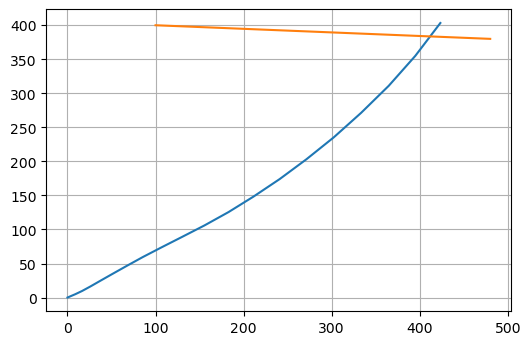

In [11]:
plt.figure(dpi=100)
plt.plot(xs_m, ys_m)
plt.plot(xs_t, ys_t)
plt.grid()
plt.show()